## Imports principais

In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm


## Implementação dos modelos para classificação


### Perceptron simples classificação

In [51]:
def perceptron_simples_classification_training(X_test, y_test, X_train, y_train, lr, epochs=100):
    '''
    Treinamento do perceptron simples voltado para classificação.
    Retorna os pesos finais, a acurácia de treino média, a acurácia de teste média, 
    e as listas de acurácia de treino e teste por época.
    '''

    # Instanciando as listas para armazenar a acurácia
    acuracia_treino_list = []
    acuracia_teste_list = []

    # Instanciando pesos
    w = np.zeros(X_train.shape[1])

    for epoch in range(epochs):
        # Fase de treinamento
        acertos_treino = 0

        for x, y_true in zip(X_train, y_train):
            u = np.dot(x, w)
            y_pred = np.sign(u)

            erro = y_true - y_pred

            if y_true == y_pred:
                acertos_treino += 1

            # Atualizando os pesos
            w += lr * erro * x

        # Calculando e armazenando a acurácia de treino
        acuracia_treino = acertos_treino / len(X_train)
        acuracia_treino_list.append(acuracia_treino)

        # Fase de teste
        acertos_teste = 0
        for x, y_true in zip(X_test, y_test):
            u = np.dot(x, w)
            y_pred = np.sign(u)

            if y_true == y_pred:
                acertos_teste += 1

        # Calculando e armazenando a acurácia de teste
        acuracia_teste = acertos_teste / len(X_test)
        acuracia_teste_list.append(acuracia_teste)

    # Calculando a acurácia média de treino e teste
    acuracia_treino_media = np.mean(acuracia_treino_list)
    acuracia_teste_media = np.mean(acuracia_teste_list)

    return w, acuracia_treino_media, acuracia_teste_media, acuracia_treino_list, acuracia_teste_list


### ADALINE classificação

In [52]:
def adaline_classification_training(X_test, y_test, X_train, y_train, lr, epochs=100):
    '''
    Treinamento do ADALINE voltado para classificação.
    Retorna os pesos finais, a acurácia de treino média, a acurácia de teste média,
    e as listas de acurácia de treino e teste por época.
    '''

    # Instanciando as listas para armazenar a acurácia
    acuracia_treino_list = []
    acuracia_teste_list = []

    # Instanciando pesos
    w = np.zeros(X_train.shape[1])

    for epoch in range(epochs):
        # Fase de treinamento
        acertos_treino = 0

        for x, y_true in zip(X_train, y_train):
            u = np.dot(x, w)
            y_pred = np.sign(u)

            erro = y_true - u

            if y_true == y_pred:
                acertos_treino += 1

            # Atualizando os pesos com a regra de atualização do ADALINE
            w += lr * erro * x

        # Calculando e armazenando a acurácia de treino
        acuracia_treino = acertos_treino / len(X_train)
        acuracia_treino_list.append(acuracia_treino)

        # Fase de teste
        acertos_teste = 0
        for x, y_true in zip(X_test, y_test):
            u = np.dot(x, w)
            y_pred = np.sign(u)

            if y_true == y_pred:
                acertos_teste += 1

        # Calculando e armazenando a acurácia de teste
        acuracia_teste = acertos_teste / len(X_test)
        acuracia_teste_list.append(acuracia_teste)

    # Calculando a acurácia média de treino e teste
    acuracia_treino_media = np.mean(acuracia_treino_list)
    acuracia_teste_media = np.mean(acuracia_teste_list)

    return w, acuracia_treino_media, acuracia_teste_media, acuracia_treino_list, acuracia_teste_list


### Perceptron de múltiplas camadas para classificação

In [53]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def mlp_classification_training(X_test,
                                y_test,
                                X_train,
                                y_train, 
                                lr, 
                                epochs=100, 
                                hidden_neurons=8):
    '''
    Treinamento de um perceptron de múltiplas camadas voltado para classificação.
    Retorna os pesos finais, a acurácia de treino média, a acurácia de teste média,
    e as listas de acurácia de treino e teste por época.
    '''

    # Certifique-se de que y_train contém apenas inteiros
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # Inicializando os pesos
    input_neurons = X_train.shape[1]
    output_neurons = len(np.unique(y_train))  # Número de classes

    # Pesos e bias entre camada de entrada e oculta
    W1 = np.random.randn(input_neurons, hidden_neurons)
    b1 = np.zeros((1, hidden_neurons))

    # Pesos e bias entre camada oculta e saída
    W2 = np.random.randn(hidden_neurons, output_neurons)
    b2 = np.zeros((1, output_neurons))

    # Listas para armazenar a acurácia
    acuracia_treino_list = []
    acuracia_teste_list = []

    for epoch in range(epochs):
        # Forward pass
        hidden_input = np.dot(X_train, W1) + b1
        hidden_output = relu(hidden_input)

        final_input = np.dot(hidden_output, W2) + b2
        final_output = sigmoid(final_input)

        # Calculando erro
        y_train_one_hot = np.eye(output_neurons)[y_train]  # Convertendo para one-hot encoding
        error = y_train_one_hot - final_output

        # Backward pass
        d_output = error * sigmoid_derivative(final_output)
        error_hidden_layer = d_output.dot(W2.T)
        d_hidden_layer = error_hidden_layer * relu_derivative(hidden_output)

        # Atualização dos pesos e bias
        W2 += hidden_output.T.dot(d_output) * lr
        b2 += np.sum(d_output, axis=0, keepdims=True) * lr
        W1 += X_train.T.dot(d_hidden_layer) * lr
        b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

        # Calculando acurácia de treino
        train_predictions = np.argmax(final_output, axis=1)
        acertos_treino = np.sum(train_predictions == y_train)
        acuracia_treino = acertos_treino / len(y_train)
        acuracia_treino_list.append(acuracia_treino)

        # Forward pass para teste
        hidden_input_test = np.dot(X_test, W1) + b1
        hidden_output_test = relu(hidden_input_test)

        final_input_test = np.dot(hidden_output_test, W2) + b2
        final_output_test = sigmoid(final_input_test)

        # Calculando acurácia de teste
        test_predictions = np.argmax(final_output_test, axis=1)
        acertos_teste = np.sum(test_predictions == y_test)
        acuracia_teste = acertos_teste / len(y_test)
        acuracia_teste_list.append(acuracia_teste)

    # Calculando a acurácia média de treino e teste
    acuracia_treino_media = np.mean(acuracia_treino_list)
    acuracia_teste_media = np.mean(acuracia_teste_list)

    return (W1, b1, W2, b2), acuracia_treino_media, acuracia_teste_media, acuracia_treino_list, acuracia_teste_list


## Implementação modelos regressão


### Perceptron Simples para Regressão

In [54]:
def perceptron_simples_regression_training(X_test, y_test, X_train, y_train, lr, epochs=100):
    '''
    Treinamento do perceptron simples voltado para regressão.
    Retorna os pesos finais, o erro quadrático médio de treino e de teste por época.
    '''

    # Adicionando a coluna de bias aos dados de entrada
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Instanciando as listas para armazenar o MSE
    mse_treino_list = []
    mse_teste_list = []

    # Instanciando pesos
    w = np.zeros(X_train.shape[1])

    for epoch in range(epochs):
        # Fase de treinamento
        for x, y_true in zip(X_train, y_train):
            y_pred = np.dot(x, w)
            erro = y_true - y_pred

            # Atualizando os pesos
            w += lr * erro * x

        # Calculando e armazenando o MSE de treino
        y_train_pred = np.dot(X_train, w)
        mse_treino = np.mean((y_train - y_train_pred) ** 2)
        mse_treino_list.append(mse_treino)

        # Calculando e armazenando o MSE de teste
        y_test_pred = np.dot(X_test, w)
        mse_teste = np.mean((y_test - y_test_pred) ** 2)
        mse_teste_list.append(mse_teste)

    mse_treino_media = np.mean(mse_treino_list)
    mse_teste_media = np.mean(mse_teste_list)

    return w, mse_treino_media, mse_teste_media, mse_treino_list, mse_teste_list

### ADALINE para Regressão

In [55]:
def adaline_regression_training(X_test, y_test, X_train, y_train, lr, epochs=100):
    '''
    Treinamento do ADALINE voltado para regressão.
    Retorna os pesos finais, a média dos erros quadráticos médios de teste e treino,
    o erro quadrático médio de treino e de teste por época.
    '''

    # Criando criterio de diferença entre EQM atual e anterior
    criterio_parada = 0.0001

    # Adicionando a coluna de bias aos dados de entrada
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Instanciando as listas para armazenar o MSE
    mse_treino_list = []
    mse_teste_list = []


    # Instanciando pesos
    w = np.zeros(X_train.shape[1])

    # Inicializando EQM anterior com um valor muito grande
    mse_anterior = 1e9

    for epoch in range(epochs):
        # Fase de treinamento
        for x, y_true in zip(X_train, y_train):
            y_pred = np.dot(x, w)
            erro = y_true - y_pred

            # Atualizando os pesos com a regra de atualização do ADALINE
            w += lr * erro * x

        # Calculando e armazenando o MSE de treino
        y_train_pred = np.dot(X_train, w)
        mse_treino = np.mean((y_train - y_train_pred) ** 2)
        mse_treino_list.append(mse_treino)

        # Calculando e armazenando o MSE de teste
        y_test_pred = np.dot(X_test, w)
        mse_teste = np.mean((y_test - y_test_pred) ** 2)
        mse_teste_list.append(mse_teste)

        # Verificando critério de parada
        if abs(mse_treino - mse_anterior) < criterio_parada:
            break
        mse_anterior = mse_treino


    mse_treino_media = np.mean(mse_treino_list)
    mse_teste_media = np.mean(mse_teste_list)

    return w, mse_treino_media, mse_teste_media, mse_treino_list, mse_teste_list



### Multi Layer Perceptron para Regressão

In [56]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def mlp_regression_training(X_test, y_test, X_train, y_train, lr, epochs=100, hidden_neurons=8):
    '''
    Treinamento de um perceptron de múltiplas camadas voltado para regressão.
    Retorna os pesos finais, o erro de treino médio, o erro de teste médio,
    e as listas de erro de treino e teste por época.
    '''

    # Certifique-se de que X_train e X_test são vetores unidimensionais
    if X_train.ndim == 1:
        X_train = X_train.reshape(-1, 1)
    if X_test.ndim == 1:
        X_test = X_test.reshape(-1, 1)

    # Inicializando os pesos
    input_neurons = X_train.shape[1]
    output_neurons = 1  # Número de saídas para regressão é 1

    # Pesos e bias entre camada de entrada e oculta
    W1 = np.random.randn(input_neurons, hidden_neurons)
    b1 = np.zeros((1, hidden_neurons))

    # Pesos e bias entre camada oculta e saída
    W2 = np.random.randn(hidden_neurons, output_neurons)
    b2 = np.zeros((1, output_neurons))

    # Listas para armazenar o erro
    erro_treino_list = []
    erro_teste_list = []

    for epoch in range(epochs):
        # Forward pass
        hidden_input = np.dot(X_train, W1) + b1
        hidden_output = relu(hidden_input)

        final_input = np.dot(hidden_output, W2) + b2
        final_output = final_input  # Saída linear para regressão

        # Calculando erro
        error = y_train.reshape(-1, 1) - final_output

        # Backward pass
        d_output = -2 * error
        error_hidden_layer = d_output.dot(W2.T)
        d_hidden_layer = error_hidden_layer * relu_derivative(hidden_output)

        # Atualização dos pesos e bias
        W2 -= hidden_output.T.dot(d_output) * lr
        b2 -= np.sum(d_output, axis=0, keepdims=True) * lr
        W1 -= X_train.T.dot(d_hidden_layer) * lr
        b1 -= np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

        # Calculando erro de treino (MSE)
        mse_treino = np.mean(error ** 2)
        erro_treino_list.append(mse_treino)

        # Forward pass para teste
        hidden_input_test = np.dot(X_test, W1) + b1
        hidden_output_test = relu(hidden_input_test)

        final_input_test = np.dot(hidden_output_test, W2) + b2
        final_output_test = final_input_test  # Saída linear para regressão

        # Calculando erro de teste (MSE)
        mse_teste = np.mean((y_test.reshape(-1, 1) - final_output_test) ** 2)
        erro_teste_list.append(mse_teste)

    # Calculando o erro médio de treino e teste
    erro_treino_media = np.mean(erro_treino_list)
    erro_teste_media = np.mean(erro_teste_list)

    return (W1, b1, W2, b2), erro_treino_media, erro_teste_media, erro_treino_list, erro_teste_list


## Primeira etapa: Spiral (Classificação) e Aerogerador (Regressão)

### Spiral

In [57]:
# Leitura do csv
spiral_df = pd.read_csv('spiral.csv', header=None)

# Mudando os nomes das colunas
spiral_df.columns = ['x1', 'x2', 'y']

# Printando as primeiras linhas
spiral_df.head()

,x1,x2,y
0,15.40724,-3.66801,1.0
1,15.07298,-1.56346,1.0
2,-15.43986,0.16502,-1.0
3,-9.26071,12.24981,-1.0
4,7.59201,7.56913,-1.0


In [58]:
# Separando as features e os targets
X = spiral_df[['x1', 'x2']].values

y = spiral_df['y'].values

X, y

(array([[ 15.40724,  -3.66801],
        [ 15.07298,  -1.56346],
        [-15.43986,   0.16502],
        ...,
        [ -6.41697,   5.92464],
        [  5.00793,  -5.7493 ],
        [  6.96596,  -6.47686]]),
 array([ 1.,  1., -1., ...,  1., -1., -1.]))

In [59]:
# Setando o número de rodadas, número de épocas e taxa de aprendizado
n_rounds = 100
n_epochs = 10
lr = 0.01

In [60]:
from sklearn.model_selection import train_test_split


# Valores que receberemos ao final do treino: pesos finais, acurácia média de treino e teste, e listas de acurácia
# Valores que iremos gerar apos o final das rodaas para teste e treino: acurácia média, mediana, mínimo, máximo e desvio padrão

# Inicializando as listas para armazenar os resultados para cada modelo
perceptron_acc_treino_list = []
perceptron_acc_test_list = []

adaline_acc_treino_list = []
adaline_acc_test_list = []

mlp_acc_treino_list = []
mlp_acc_test_list = []



for i in range(n_rounds):
    # Separando os dados de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Normalizando os dados
    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Treinando o perceptron simples
    w_perceptron, acc_treino_perceptron, acc_teste_perceptron, _, _ = perceptron_simples_classification_training(X_test, y_test, X_train, y_train, lr, epochs=n_epochs)
    perceptron_acc_treino_list.append(acc_treino_perceptron)
    perceptron_acc_test_list.append(acc_teste_perceptron)

    # Treinando o ADALINE
    w_adaline, acc_treino_adaline, acc_teste_adaline, _, _ = adaline_classification_training(X_test, y_test, X_train, y_train, lr, epochs=n_epochs)
    adaline_acc_treino_list.append(acc_treino_adaline)
    adaline_acc_test_list.append(acc_teste_adaline)

    # Treinando o MLP
    pesos_mlp, acc_treino_mlp, acc_teste_mlp, _, _ = mlp_classification_training(X_test, y_test, X_train, y_train, lr, epochs=n_epochs)
    mlp_acc_treino_list.append(acc_treino_mlp)
    mlp_acc_test_list.append(acc_teste_mlp)

    if i % 10 == 0:
        print(f'Rodada {i + 1} finalizada')



Rodada 1 finalizada
Rodada 11 finalizada
Rodada 21 finalizada


C:\Users\FelipeDev\AppData\Local\Temp\ipykernel_9640\646005426.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Rodada 31 finalizada
Rodada 41 finalizada
Rodada 51 finalizada
Rodada 61 finalizada
Rodada 71 finalizada
Rodada 81 finalizada
Rodada 91 finalizada


In [61]:
# Calculando as métricas para cada modelo
# Perceptron
perceptron_acc_treino_mean = np.mean(perceptron_acc_treino_list)
perceptron_acc_treino_median = np.median(perceptron_acc_treino_list)
perceptron_acc_treino_min = np.min(perceptron_acc_treino_list)
perceptron_acc_treino_max = np.max(perceptron_acc_treino_list)
perceptron_acc_treino_std = np.std(perceptron_acc_treino_list)

# ADALINE
adaline_acc_treino_mean = np.mean(adaline_acc_treino_list)
adaline_acc_treino_median = np.median(adaline_acc_treino_list)
adaline_acc_treino_min = np.min(adaline_acc_treino_list)
adaline_acc_treino_max = np.max(adaline_acc_treino_list)
adaline_acc_treino_std = np.std(adaline_acc_treino_list)

# MLP
mlp_acc_treino_mean = np.mean(mlp_acc_treino_list)
mlp_acc_treino_median = np.median(mlp_acc_treino_list)
mlp_acc_treino_min = np.min(mlp_acc_treino_list)
mlp_acc_treino_max = np.max(mlp_acc_treino_list)
mlp_acc_treino_std = np.std(mlp_acc_treino_list)

# Colunas para o dataframe
nomes = ['Perceptron', 'ADALINE', 'MLP']
medias = [perceptron_acc_treino_mean, adaline_acc_treino_mean, mlp_acc_treino_mean]
medianas = [perceptron_acc_treino_median, adaline_acc_treino_median, mlp_acc_treino_median]
minimos = [perceptron_acc_treino_min, adaline_acc_treino_min, mlp_acc_treino_min]
maximos = [perceptron_acc_treino_max, adaline_acc_treino_max, mlp_acc_treino_max]
stds = [perceptron_acc_treino_std, adaline_acc_treino_std, mlp_acc_treino_std]

In [62]:
# Printando resultados 
for nome, media, mediana, minimo, maximo, std in zip(nomes, medias, medianas, minimos, maximos, stds):
    print(f'Modelo: {nome}')
    print(f'Acurácia média: {media}')
    print(f'Acurácia mediana: {mediana}')
    print(f'Acurácia mínima: {minimo}')
    print(f'Acurácia máxima: {maximo}')
    print(f'Desvio padrão: {std}')
    print('\n')


Modelo: Perceptron
Acurácia média: 0.6229362500000001
Acurácia mediana: 0.62365625
Acurácia mínima: 0.6056250000000001
Acurácia máxima: 0.6440625
Desvio padrão: 0.008655457905997812


Modelo: ADALINE
Acurácia média: 0.5660000000000001
Acurácia mediana: 0.5666249999999999
Acurácia mínima: 0.5388125
Acurácia máxima: 0.5875000000000001
Desvio padrão: 0.01044584995345041


Modelo: MLP
Acurácia média: 0.457269375
Acurácia mediana: 0.4779375
Acurácia mínima: 0.1836875
Acurácia máxima: 0.510375
Desvio padrão: 0.058834653568682414




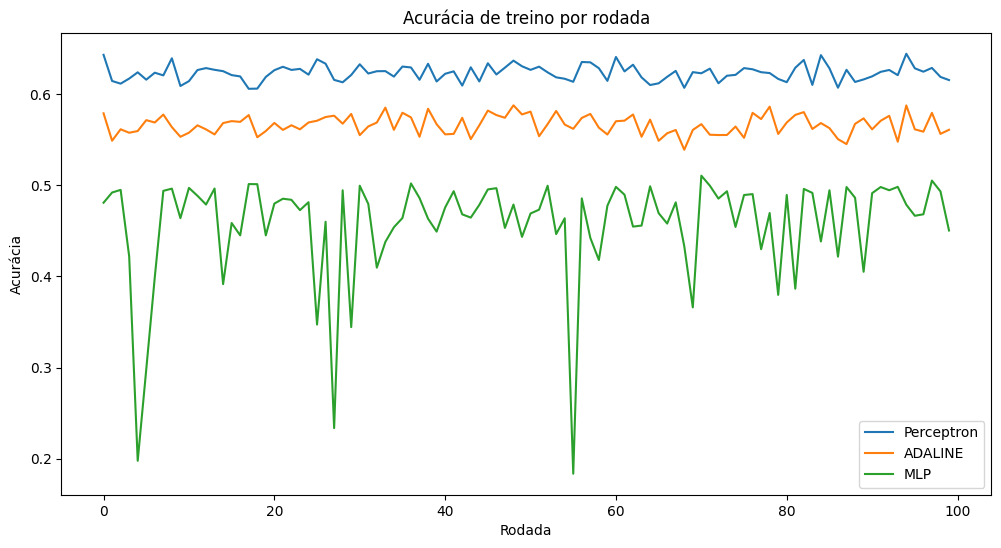

In [63]:
# Plotando as acurácias de treino
plt.figure(figsize=(12, 6))
plt.plot(perceptron_acc_treino_list, label='Perceptron')
plt.plot(adaline_acc_treino_list, label='ADALINE')
plt.plot(mlp_acc_treino_list, label='MLP')
plt.xlabel('Rodada')
plt.ylabel('Acurácia')
plt.title('Acurácia de treino por rodada')
plt.legend()
plt.show()


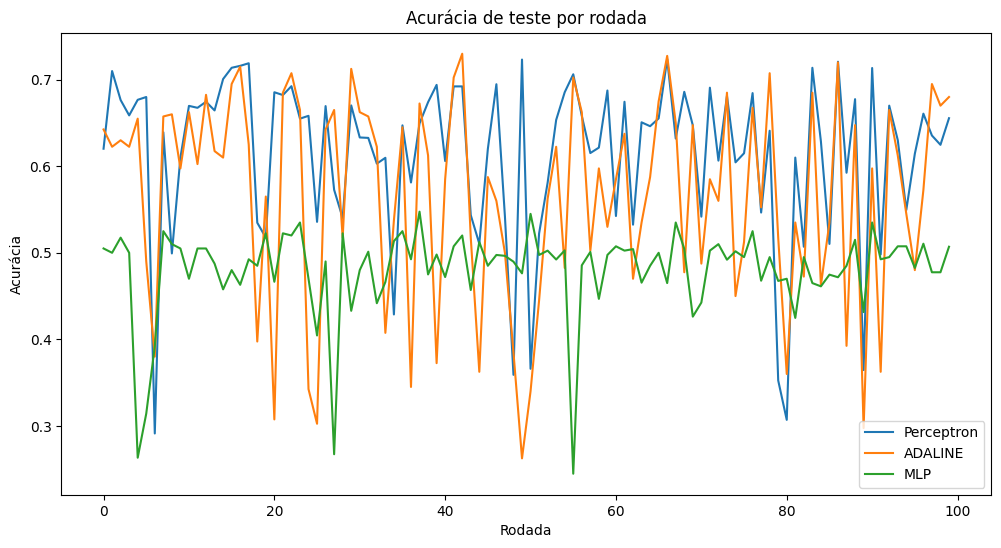

In [64]:
# Plotando as acurácias de teste
plt.figure(figsize=(12, 6))
plt.plot(perceptron_acc_test_list, label='Perceptron')
plt.plot(adaline_acc_test_list, label='ADALINE')
plt.plot(mlp_acc_test_list, label='MLP')
plt.xlabel('Rodada')
plt.ylabel('Acurácia')
plt.title('Acurácia de teste por rodada')
plt.legend()
plt.show()


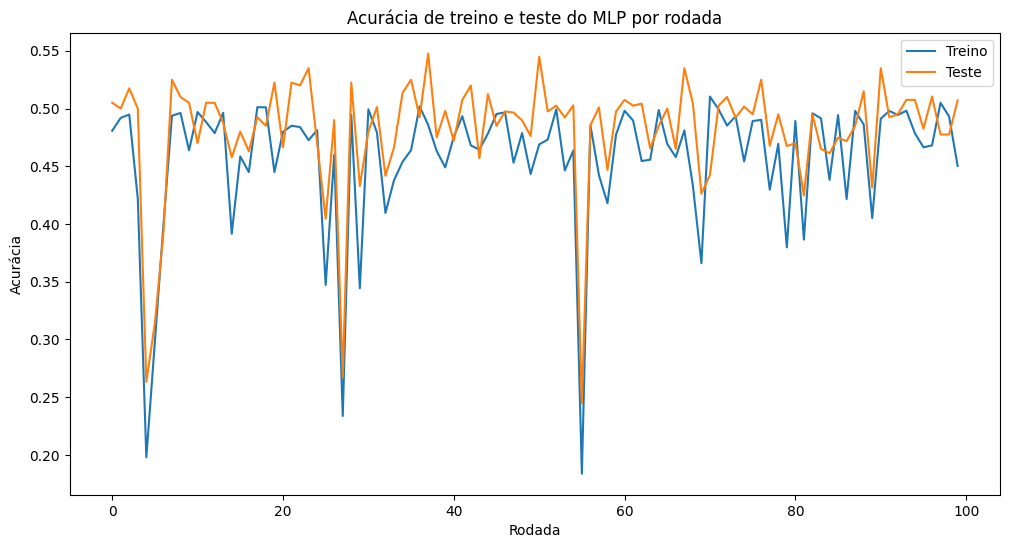

In [65]:
# Plotando as acurácias de treino e teste do MLP
plt.figure(figsize=(12, 6))
plt.plot(mlp_acc_treino_list, label='Treino')
plt.plot(mlp_acc_test_list, label='Teste')
plt.xlabel('Rodada')
plt.ylabel('Acurácia')
plt.title('Acurácia de treino e teste do MLP por rodada')
plt.legend()
plt.show()


In [66]:
# Gerando um dataframe com os resultados
resultados_df = pd.DataFrame({
    'Modelo': nomes,
    'Acurácia média': medias,
    'Acurácia mediana': medianas,
    'Acurácia mínima': minimos,
    'Acurácia máxima': maximos,
    'Desvio padrão': stds
})

resultados_df

,Modelo,Acurácia média,Acurácia mediana,Acurácia mínima,Acurácia máxima,Desvio padrão
0,Perceptron,0.622936,0.623656,0.605625,0.644062,0.008655
1,ADALINE,0.566000,0.566625,0.538813,0.587500,0.010446
2,MLP,0.457269,0.477938,0.183688,0.510375,0.058835


In [67]:
# Salvando o dataframe em um arquivo csv
resultados_df.to_csv('resultados/resultados_spiral.csv', index=False)

### Aerogerador

In [68]:
# Leitura do csv
aerogerador_df = pd.read_csv('aerogerador.dat', sep='\s+', header=None, names=['velocidade_vento', 'potencia_gerada'])


# Printando as primeiras linhas
aerogerador_df.head()

,velocidade_vento,potencia_gerada
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [69]:
# Separando as features e os targets
X = aerogerador_df['velocidade_vento'].values
y = aerogerador_df['potencia_gerada'].values

X, y

(array([ 0. ,  0. ,  0. , ..., 14.1, 14.3, 14.4]),
 array([  0,   0,   0, ..., 508, 508, 503], dtype=int64))

In [70]:
# Setando o número de rodadas, número de épocas e taxa de aprendizado
n_rounds = 100
n_epochs = 10
lr = 0.01


In [71]:
from sklearn.model_selection import train_test_split


# Valores que receberemos ao final do treino: pesos finais, acurácia média de treino e teste, e listas de acurácia
# Valores que iremos gerar apos o final das rodaas para teste e treino: acurácia média, mediana, mínimo, máximo e desvio padrão

# Inicializando as listas para armazenar os resultados para cada modelo
perceptron_acc_treino_list = []
perceptron_acc_test_list = []

adaline_acc_treino_list = []
adaline_acc_test_list = []

mlp_acc_treino_list = []
mlp_acc_test_list = []

for i in range(n_rounds):
    # Separando os dados de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Normalizando os dados
    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Treinando o perceptron simples
    w_perceptron, mse_treino_perceptron, mse_teste_perceptron, _, _ = perceptron_simples_regression_training(X_test, y_test, X_train, y_train, lr, epochs=n_epochs)
    perceptron_acc_treino_list.append(mse_treino_perceptron)
    perceptron_acc_test_list.append(mse_teste_perceptron)

    # Treinando o ADALINE
    w_adaline, mse_treino_adaline, mse_teste_adaline, _, _ = adaline_regression_training(X_test, y_test, X_train, y_train, lr, epochs=n_epochs)
    adaline_acc_treino_list.append(mse_treino_adaline)
    adaline_acc_test_list.append(mse_teste_adaline)

    # Treinando o MLP
    pesos_mlp, mse_treino_mlp, mse_teste_mlp, _, _ = mlp_regression_training(X_test, y_test, X_train, y_train, lr, epochs=n_epochs)
    mlp_acc_treino_list.append(mse_treino_mlp)
    mlp_acc_test_list.append(mse_teste_mlp)

    if i % 10 == 0:
        print(f'Rodada {i + 1} finalizada')

Rodada 1 finalizada
Rodada 11 finalizada
Rodada 21 finalizada
Rodada 31 finalizada
Rodada 41 finalizada
Rodada 51 finalizada
Rodada 61 finalizada
Rodada 71 finalizada
Rodada 81 finalizada
Rodada 91 finalizada


In [72]:
# Calculando as métricas para cada modelo
# Perceptron
perceptron_acc_treino_mean = np.mean(perceptron_acc_treino_list)
perceptron_acc_treino_median = np.median(perceptron_acc_treino_list)
perceptron_acc_treino_min = np.min(perceptron_acc_treino_list)
perceptron_acc_treino_max = np.max(perceptron_acc_treino_list)
perceptron_acc_treino_std = np.std(perceptron_acc_treino_list)

# ADALINE
adaline_acc_treino_mean = np.mean(adaline_acc_treino_list)
adaline_acc_treino_median = np.median(adaline_acc_treino_list)
adaline_acc_treino_min = np.min(adaline_acc_treino_list)
adaline_acc_treino_max = np.max(adaline_acc_treino_list)
adaline_acc_treino_std = np.std(adaline_acc_treino_list)

# MLP
mlp_acc_treino_mean = np.mean(mlp_acc_treino_list)
mlp_acc_treino_median = np.median(mlp_acc_treino_list)
mlp_acc_treino_min = np.min(mlp_acc_treino_list)
mlp_acc_treino_max = np.max(mlp_acc_treino_list)
mlp_acc_treino_std = np.std(mlp_acc_treino_list)

# Colunas para o dataframe
nomes = ['Perceptron', 'ADALINE', 'MLP']
medias = [perceptron_acc_treino_mean, adaline_acc_treino_mean, mlp_acc_treino_mean]
medianas = [perceptron_acc_treino_median, adaline_acc_treino_median, mlp_acc_treino_median]
minimos = [perceptron_acc_treino_min, adaline_acc_treino_min, mlp_acc_treino_min]
maximos = [perceptron_acc_treino_max, adaline_acc_treino_max, mlp_acc_treino_max]
stds = [perceptron_acc_treino_std, adaline_acc_treino_std, mlp_acc_treino_std]

In [73]:
# Printando resultados 
for nome, media, mediana, minimo, maximo, std in zip(nomes, medias, medianas, minimos, maximos, stds):
    print(f'Modelo: {nome}')
    print(f'Erro médio: {media}')
    print(f'Erro mediano: {mediana}')
    print(f'Erro mínimo: {minimo}')
    print(f'Erro máximo: {maximo}')
    print(f'Desvio padrão: {std}')
    print('\n')
    

Modelo: Perceptron
Erro médio: 1497.430224394206
Erro mediano: 1076.490436256674
Erro mínimo: 804.0182355396491
Erro máximo: 13834.689585049526
Desvio padrão: 1493.9698541526623


Modelo: ADALINE
Erro médio: 1497.430224394206
Erro mediano: 1076.490436256674
Erro mínimo: 804.0182355396491
Erro máximo: 13834.689585049526
Desvio padrão: 1493.9698541526623


Modelo: MLP
Erro médio: 1.352851180973051e+46
Erro mediano: 5.257725062919647e+45
Erro mínimo: 5.5815808462425845e+31
Erro máximo: 1.0153248942584721e+47
Desvio padrão: 2.1145052895585335e+46




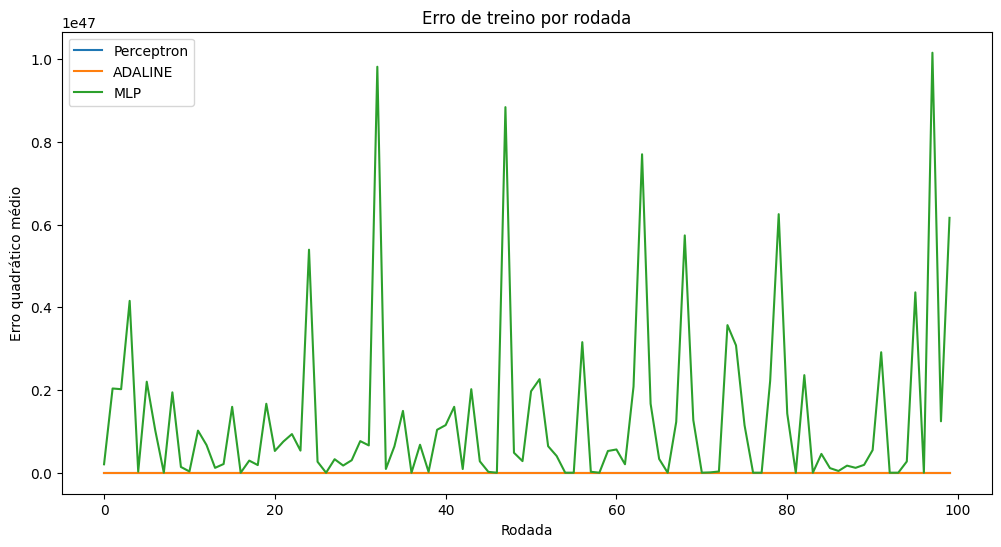

In [74]:
# Plotando os erros de treino
plt.figure(figsize=(12, 6))
plt.plot(perceptron_acc_treino_list, label='Perceptron')
plt.plot(adaline_acc_treino_list, label='ADALINE')
plt.plot(mlp_acc_treino_list, label='MLP')
plt.xlabel('Rodada')
plt.ylabel('Erro quadrático médio')
plt.title('Erro de treino por rodada')
plt.legend()
plt.show()


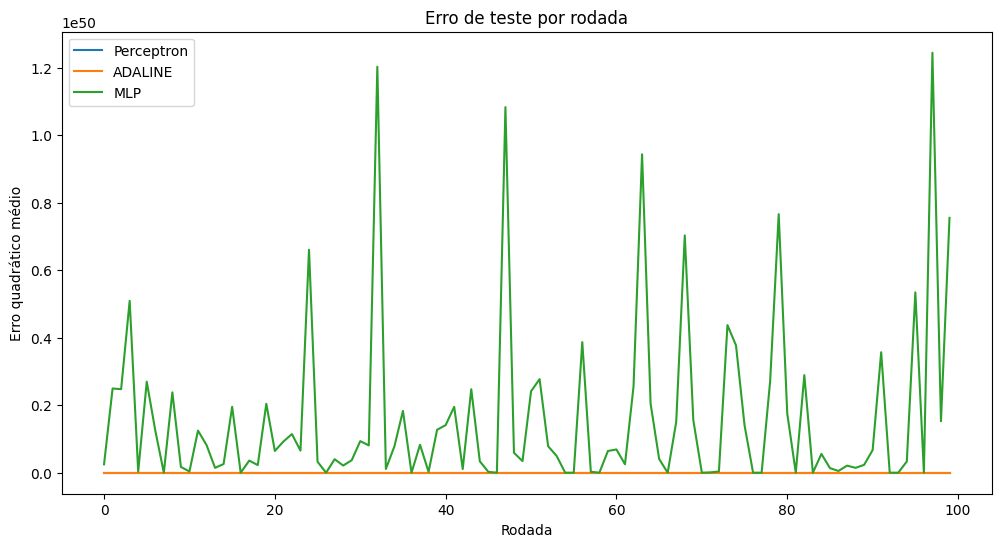

In [75]:
# Plotando os erros de teste
plt.figure(figsize=(12, 6))
plt.plot(perceptron_acc_test_list, label='Perceptron')
plt.plot(adaline_acc_test_list, label='ADALINE')
plt.plot(mlp_acc_test_list, label='MLP')
plt.xlabel('Rodada')
plt.ylabel('Erro quadrático médio')
plt.title('Erro de teste por rodada')
plt.legend()
plt.show()

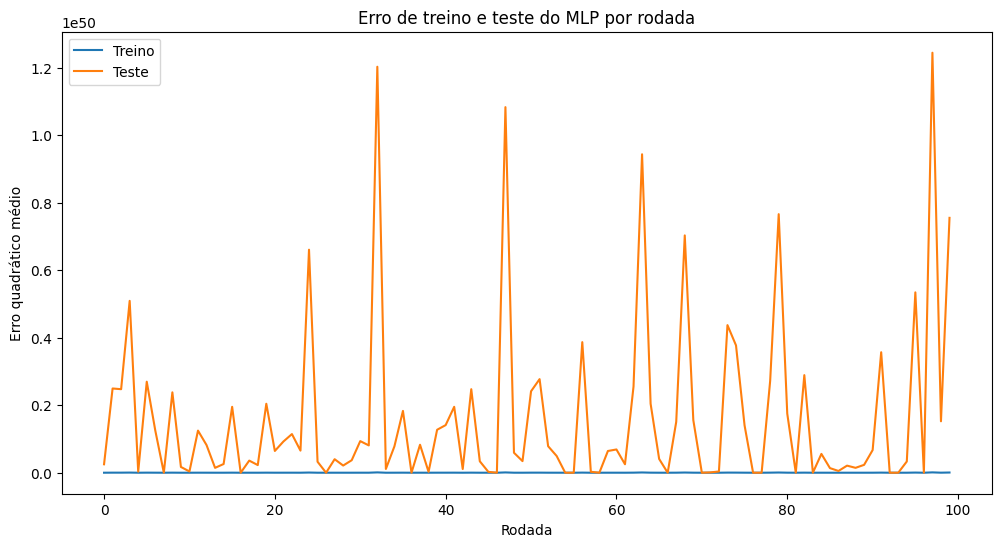

In [76]:
# Plotando os erros de treino e teste do MLP
plt.figure(figsize=(12, 6))
plt.plot(mlp_acc_treino_list, label='Treino')
plt.plot(mlp_acc_test_list, label='Teste')
plt.xlabel('Rodada')
plt.ylabel('Erro quadrático médio')
plt.title('Erro de treino e teste do MLP por rodada')
plt.legend()
plt.show()

In [77]:
# Gerando um dataframe com os resultados
resultados_df = pd.DataFrame({
    'Modelo': nomes,
    'Erro média': medias,
    'Erro mediana': medianas,
    'Erro mínima': minimos,
    'Erro máxima': maximos,
    'Desvio padrão': stds
})

resultados_df

,Modelo,Erro média,Erro mediana,Erro mínima,Erro máxima,Desvio padrão
0,Perceptron,1.497430e+03,1.076490e+03,8.040182e+02,1.383469e+04,1.493970e+03
1,ADALINE,1.497430e+03,1.076490e+03,8.040182e+02,1.383469e+04,1.493970e+03
2,MLP,1.352851e+46,5.257725e+45,5.581581e+31,1.015325e+47,2.114505e+46


## Segunda etapa: Ozone (Classificação)

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Caminhos para os arquivos (ajuste os caminhos conforme necessário)
eight_hr_data_path = 'problema2/eighthr.data'
one_hr_data_path = 'problema2/onehr.data'

# Leitura dos dados
eight_hr_data = pd.read_csv(eight_hr_data_path, header=None)
one_hr_data = pd.read_csv(one_hr_data_path, header=None)

# Substituir "?" por NaN
eight_hr_data.replace("?", np.nan, inplace=True)
one_hr_data.replace("?", np.nan, inplace=True)

# Remover a coluna de data (primeira coluna)
eight_hr_data = eight_hr_data.iloc[:, 1:]
one_hr_data = one_hr_data.iloc[:, 1:]

# Converter todas as colunas para float
eight_hr_data = eight_hr_data.astype(float)
one_hr_data = one_hr_data.astype(float)

# Substituir valores NaN pela média das colunas
eight_hr_data.fillna(eight_hr_data.mean(), inplace=True)
one_hr_data.fillna(one_hr_data.mean(), inplace=True)

# Separar características (features) e alvo (target)
X_eight_hr = eight_hr_data.iloc[:, :-1]
y_eight_hr = eight_hr_data.iloc[:, -1].astype(int)
X_one_hr = one_hr_data.iloc[:, :-1]
y_one_hr = one_hr_data.iloc[:, -1].astype(int)

# Normalizar os dados
scaler = StandardScaler()
X_eight_hr_scaled = scaler.fit_transform(X_eight_hr)
X_one_hr_scaled = scaler.fit_transform(X_one_hr)

# Dividir os dados em conjuntos de treino e teste
X_eight_hr_train, X_eight_hr_test, y_eight_hr_train, y_eight_hr_test = train_test_split(X_eight_hr_scaled, y_eight_hr, test_size=0.2, random_state=42)
X_one_hr_train, X_one_hr_test, y_one_hr_train, y_one_hr_test = train_test_split(X_one_hr_scaled, y_one_hr, test_size=0.2, random_state=42)

# Verificar as formas dos conjuntos de dados
print(X_eight_hr_train.shape, X_eight_hr_test.shape, y_eight_hr_train.shape, y_eight_hr_test.shape)
print(X_one_hr_train.shape, X_one_hr_test.shape, y_one_hr_train.shape, y_one_hr_test.shape)


(2027, 72) (507, 72) (2027,) (507,)
(2028, 72) (508, 72) (2028,) (508,)


In [79]:
w, perceptron_acuracia_treino_media, perceptron_acuracia_teste_media, perceptron_acuracia_treino_list, perceptron_acuracia_teste_list = perceptron_simples_classification_training(
    X_test=X_eight_hr_test,
    y_test=y_eight_hr_test,
    X_train=X_eight_hr_train,
    y_train=y_eight_hr_train,
    lr=0.01,
    epochs=100
)
print(f"Perceptron Simples - Acurácia média de treino: {perceptron_acuracia_treino_media}, Acurácia média de teste: {perceptron_acuracia_teste_media}")


Perceptron Simples - Acurácia média de treino: 0.03601381351751356, Acurácia média de teste: 0.03084812623274161


In [80]:
w, adaline_acuracia_treino_media, adaline_acuracia_teste_media, adaline_acuracia_treino_list, adaline_acuracia_teste_list = adaline_classification_training(
    X_test=X_eight_hr_test,
    y_test=y_eight_hr_test,
    X_train=X_eight_hr_train,
    y_train=y_eight_hr_train,
    lr=0.01,
    epochs=100
)
print(f"ADALINE - Acurácia média de treino: {adaline_acuracia_treino_media}, Acurácia média de teste: {adaline_acuracia_teste_media}")


ADALINE - Acurácia média de treino: 0.04707449432659102, Acurácia média de teste: 0.04195266272189349


In [81]:
(W1, b1, W2, b2), mlp_acuracia_treino_media, mlp_acuracia_teste_media, mlp_acuracia_treino_list, mlp_acuracia_teste_list = mlp_classification_training(
    X_test=X_eight_hr_test,
    y_test=y_eight_hr_test,
    X_train=X_eight_hr_train,
    y_train=y_eight_hr_train,
    lr=0.01,
    epochs=100,
    hidden_neurons=8
)
print(f"MLP - Acurácia média de treino: {mlp_acuracia_treino_media}, Acurácia média de teste: {mlp_acuracia_teste_media}")


MLP - Acurácia média de treino: 0.9346373951652691, Acurácia média de teste: 0.9349112426035504


In [82]:
# Calculando metricas para cada modelo
# Perceptron
perceptron_acuracia_treino_mean = np.mean(perceptron_acuracia_treino_list)
perceptron_acuracia_treino_median = np.median(perceptron_acuracia_treino_list)
perceptron_acuracia_treino_min = np.min(perceptron_acuracia_treino_list)
perceptron_acuracia_treino_max = np.max(perceptron_acuracia_treino_list)
perceptron_acuracia_treino_std = np.std(perceptron_acuracia_treino_list)

# ADALINE
adaline_acuracia_treino_mean = np.mean(adaline_acuracia_treino_list)
adaline_acuracia_treino_median = np.median(adaline_acuracia_treino_list)
adaline_acuracia_treino_min = np.min(adaline_acuracia_treino_list)
adaline_acuracia_treino_max = np.max(adaline_acuracia_treino_list)
adaline_acuracia_treino_std = np.std(adaline_acuracia_treino_list)

# MLP
mlp_acuracia_treino_mean = np.mean(mlp_acuracia_treino_list)
mlp_acuracia_treino_median = np.median(mlp_acuracia_treino_list)
mlp_acuracia_treino_min = np.min(mlp_acuracia_treino_list)
mlp_acuracia_treino_max = np.max(mlp_acuracia_treino_list)
mlp_acuracia_treino_std = np.std(mlp_acuracia_treino_list)

# Colunas para o dataframe
nomes = ['Perceptron', 'ADALINE', 'MLP']
medias = [perceptron_acuracia_treino_mean, adaline_acuracia_treino_mean, mlp_acuracia_treino_mean]
medianas = [perceptron_acuracia_treino_median, adaline_acuracia_treino_median, mlp_acuracia_treino_median]
minimos = [perceptron_acuracia_treino_min, adaline_acuracia_treino_min, mlp_acuracia_treino_min]
maximos = [perceptron_acuracia_treino_max, adaline_acuracia_treino_max, mlp_acuracia_treino_max]
stds = [perceptron_acuracia_treino_std, adaline_acuracia_treino_std, mlp_acuracia_treino_std]



In [83]:
# Printando resultados
for nome, media, mediana, minimo, maximo, std in zip(nomes, medias, medianas, minimos, maximos, stds):
    print(f'Modelo: {nome}')
    print(f'Acurácia média: {media}')
    print(f'Acurácia mediana: {mediana}')
    print(f'Acurácia mínima: {minimo}')
    print(f'Acurácia máxima: {maximo}')
    print(f'Desvio padrão: {std}')
    print('\n')

Modelo: Perceptron
Acurácia média: 0.03601381351751356
Acurácia mediana: 0.036013813517513565
Acurácia mínima: 0.02960039467192896
Acurácia máxima: 0.04292057227429699
Desvio padrão: 0.0026346383666144427


Modelo: ADALINE
Acurácia média: 0.04707449432659102
Acurácia mediana: 0.04686729156388752
Acurácia mínima: 0.045880611741489885
Acurácia máxima: 0.053774050320670945
Desvio padrão: 0.0007389566588397739


Modelo: MLP
Acurácia média: 0.9346373951652691
Acurácia mediana: 0.9373458312777504
Acurácia mínima: 0.6665022200296004
Acurácia máxima: 0.9373458312777504
Desvio padrão: 0.026948599061249832




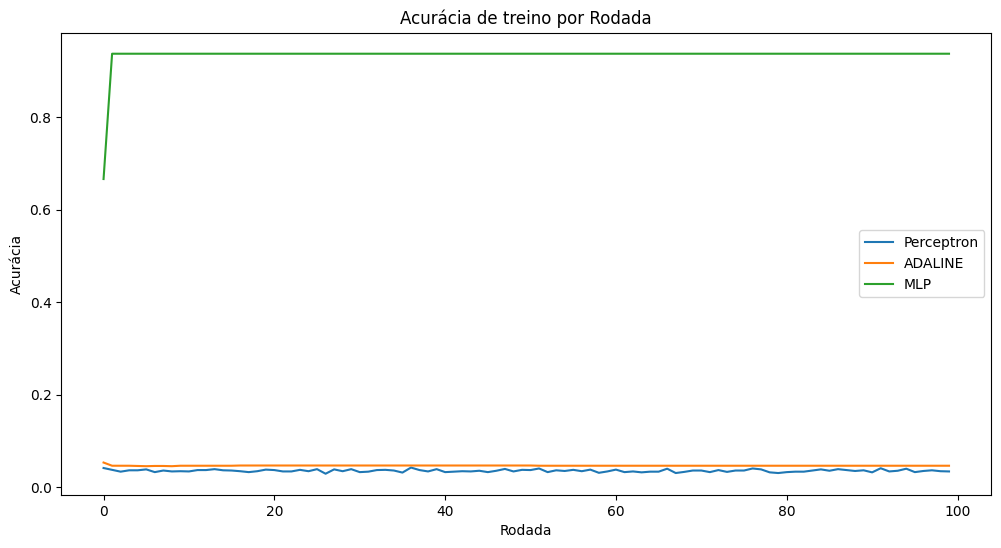

In [84]:
# Plotando as acurácias de treino
plt.figure(figsize=(12, 6))
plt.plot(perceptron_acuracia_treino_list, label='Perceptron')
plt.plot(adaline_acuracia_treino_list, label='ADALINE')
plt.plot(mlp_acuracia_treino_list, label='MLP')
plt.xlabel('Rodada')
plt.ylabel('Acurácia')
plt.title('Acurácia de treino por Rodada')
plt.legend()
plt.show()


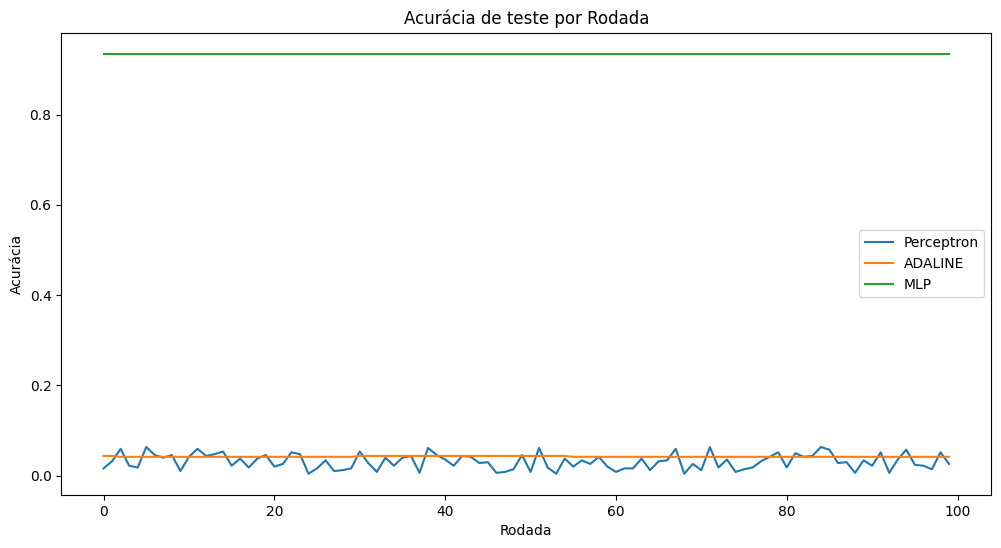

In [85]:
# Plotando as acurácias de teste
plt.figure(figsize=(12, 6))
plt.plot(perceptron_acuracia_teste_list, label='Perceptron')
plt.plot(adaline_acuracia_teste_list, label='ADALINE')
plt.plot(mlp_acuracia_teste_list, label='MLP')
plt.xlabel('Rodada')
plt.ylabel('Acurácia')
plt.title('Acurácia de teste por Rodada')
plt.legend()
plt.show()

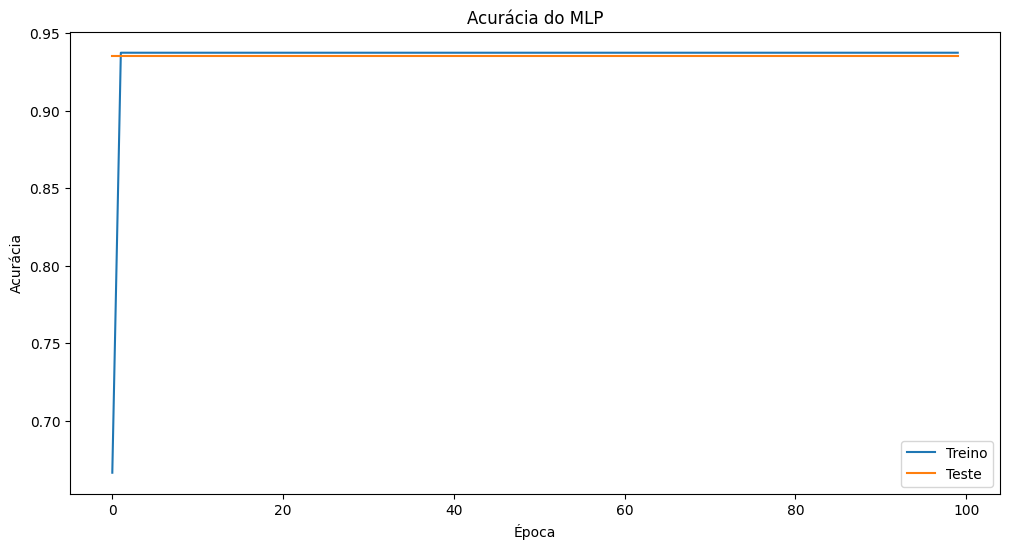

In [86]:
# Plotando treino e teste do MLP
plt.figure(figsize=(12, 6))
plt.plot(mlp_acuracia_treino_list, label='Treino')
plt.plot(mlp_acuracia_teste_list, label='Teste')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Acurácia do MLP')
plt.legend()
plt.show()

In [87]:
# Gerando um dataframe com os resultados
resultados_df = pd.DataFrame({
    'Modelo': nomes,
    'Acurácia média': medias,
    'Acurácia mediana': medianas,
    'Acurácia mínima': minimos,
    'Acurácia máxima': maximos,
    'Desvio padrão': stds
})
resultados_df

,Modelo,Acurácia média,Acurácia mediana,Acurácia mínima,Acurácia máxima,Desvio padrão
0,Perceptron,0.036014,0.036014,0.029600,0.042921,0.002635
1,ADALINE,0.047074,0.046867,0.045881,0.053774,0.000739
2,MLP,0.934637,0.937346,0.666502,0.937346,0.026949
